# White Wine Quality Analysis

#### In this project, we are going through the data which contains the values of physicochemial properties of white wine. We are going to perform linear regression and the project goal is to predict the quality of the wine.

#### Data: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
url = (r'https://raw.githubusercontent.com/prathamgupta36/Wine-Quality-Analysis/main/Data/winequality-white.csv')
df = pd.read_csv(url, sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
733,6.6,0.25,0.3,14.4,0.052,40.0,183.0,0.998,3.02,0.5,9.1,6


In [5]:
df = df.rename(columns={'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
                        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide', 'total sulfur dioxide':'Total Sulfur Dioxide',
                        'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates', 'alcohol': 'Alcohol', 'quality': 'Quality'})
print(df)

      Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      Free Sulfur Dioxide  

In [6]:
df

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Null Value Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         4898 non-null   float64
 1   Volatile Acidity      4898 non-null   float64
 2   Citric Acid           4898 non-null   float64
 3   Residual Sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free Sulfur Dioxide   4898 non-null   float64
 6   Total Sulfur Dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
 11  Quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
df.isnull().any()

Fixed Acidity           False
Volatile Acidity        False
Citric Acid             False
Residual Sugar          False
Chlorides               False
Free Sulfur Dioxide     False
Total Sulfur Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                 False
Quality                 False
dtype: bool

### No null values found so we can.

<AxesSubplot:>

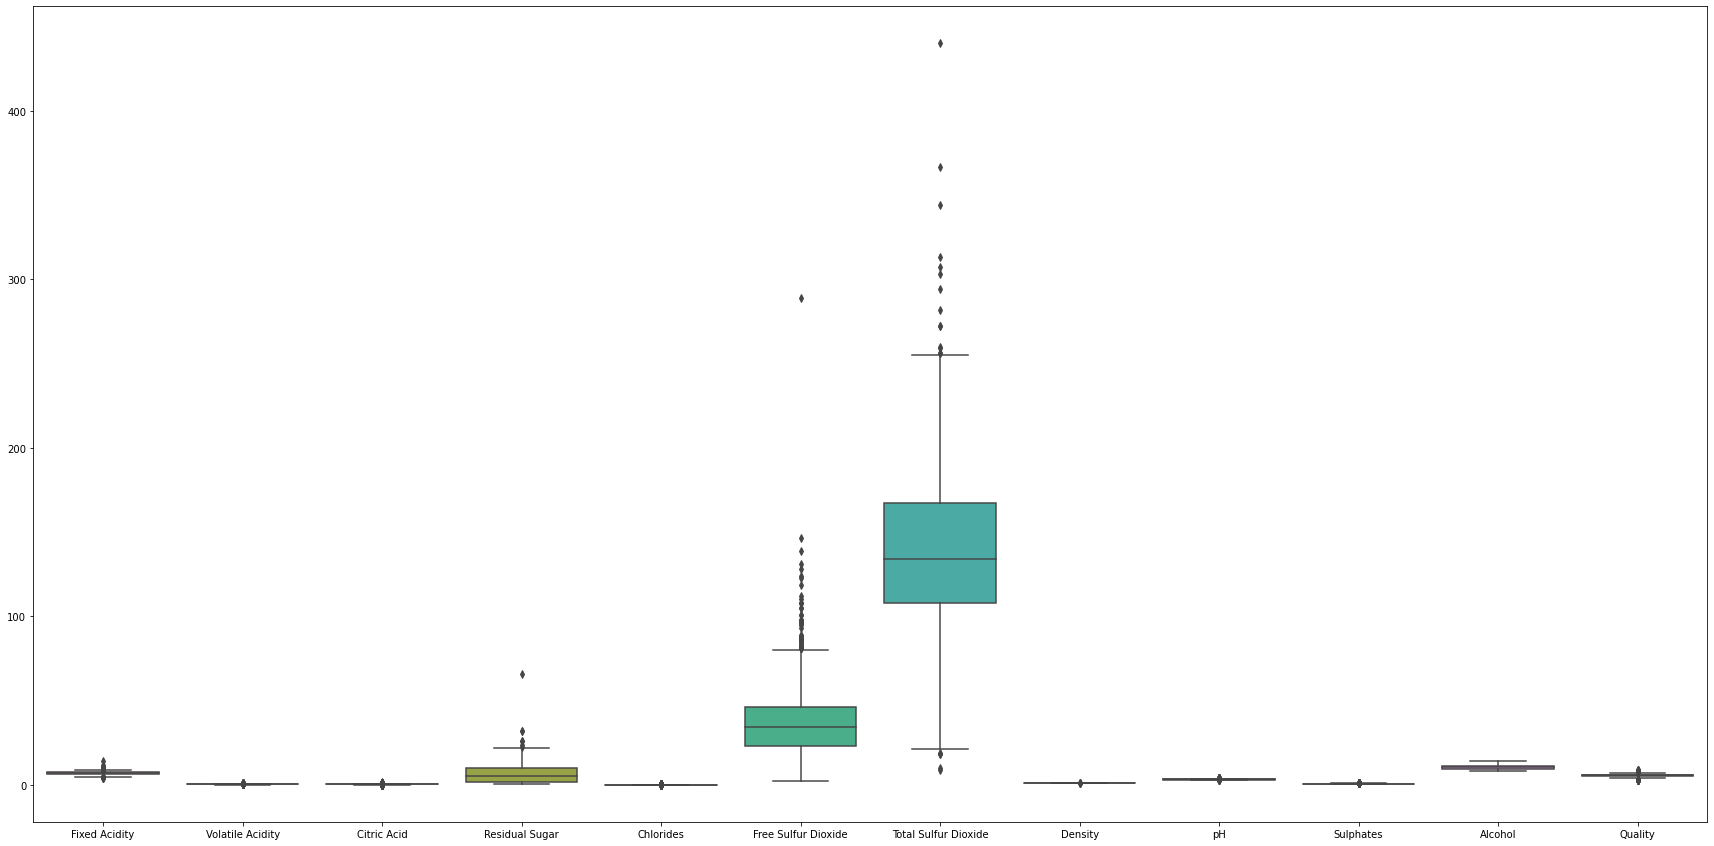

In [9]:
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)

<AxesSubplot:>

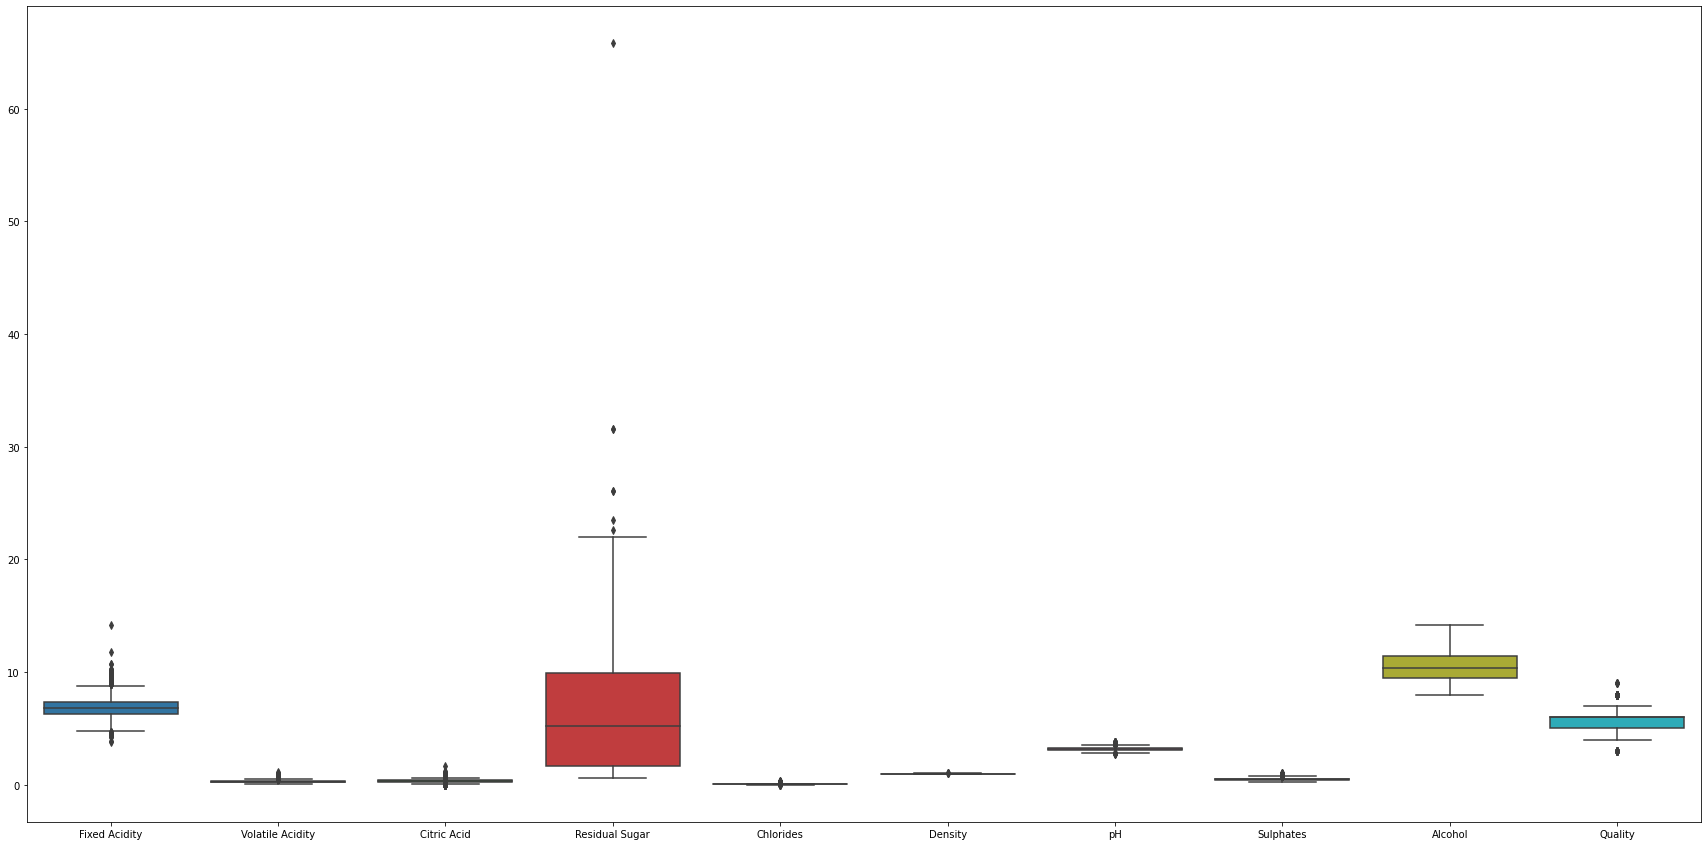

In [10]:
plt.figure(figsize=(30, 15))
zoom = df[['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Density', 'pH', 'Sulphates', 'Alcohol', 'Quality']]
sns.boxplot(data=zoom)

### Multivariate Analysis

<Figure size 2160x1080 with 0 Axes>

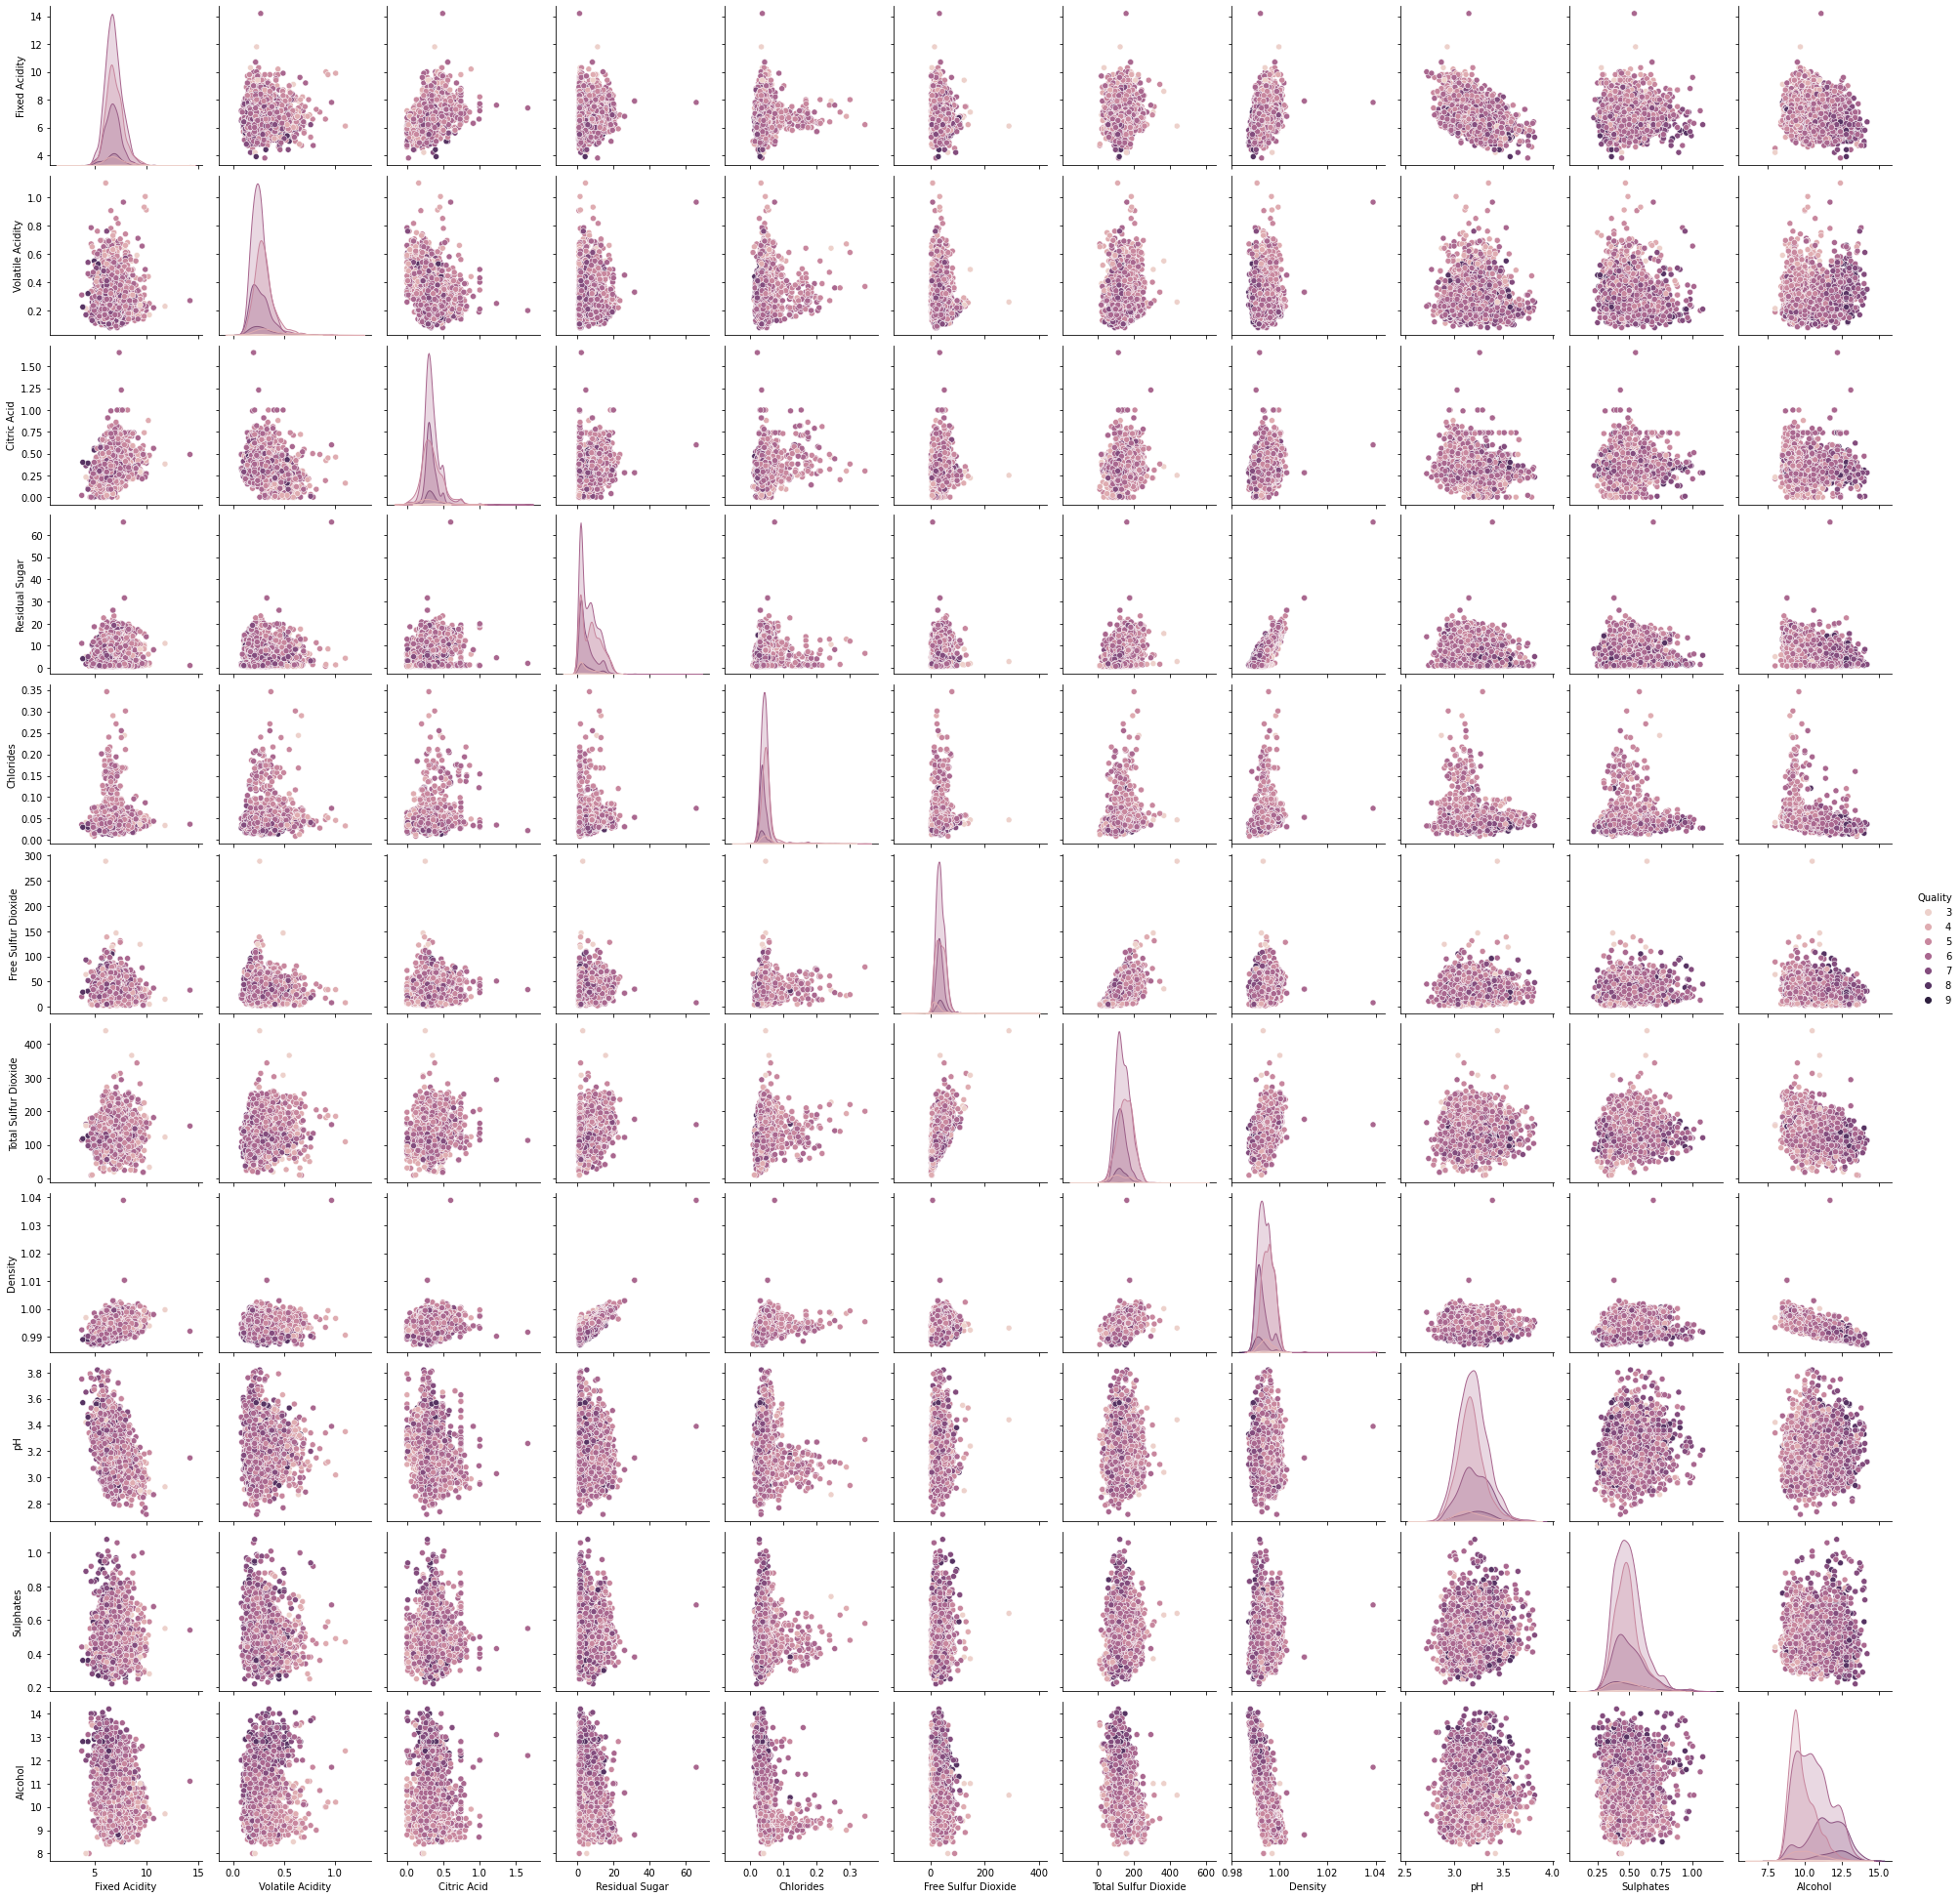

In [11]:
plt.figure(figsize=(30, 15))
sns.pairplot(data=df, hue='Quality')
plt.show()

#### Heatmap

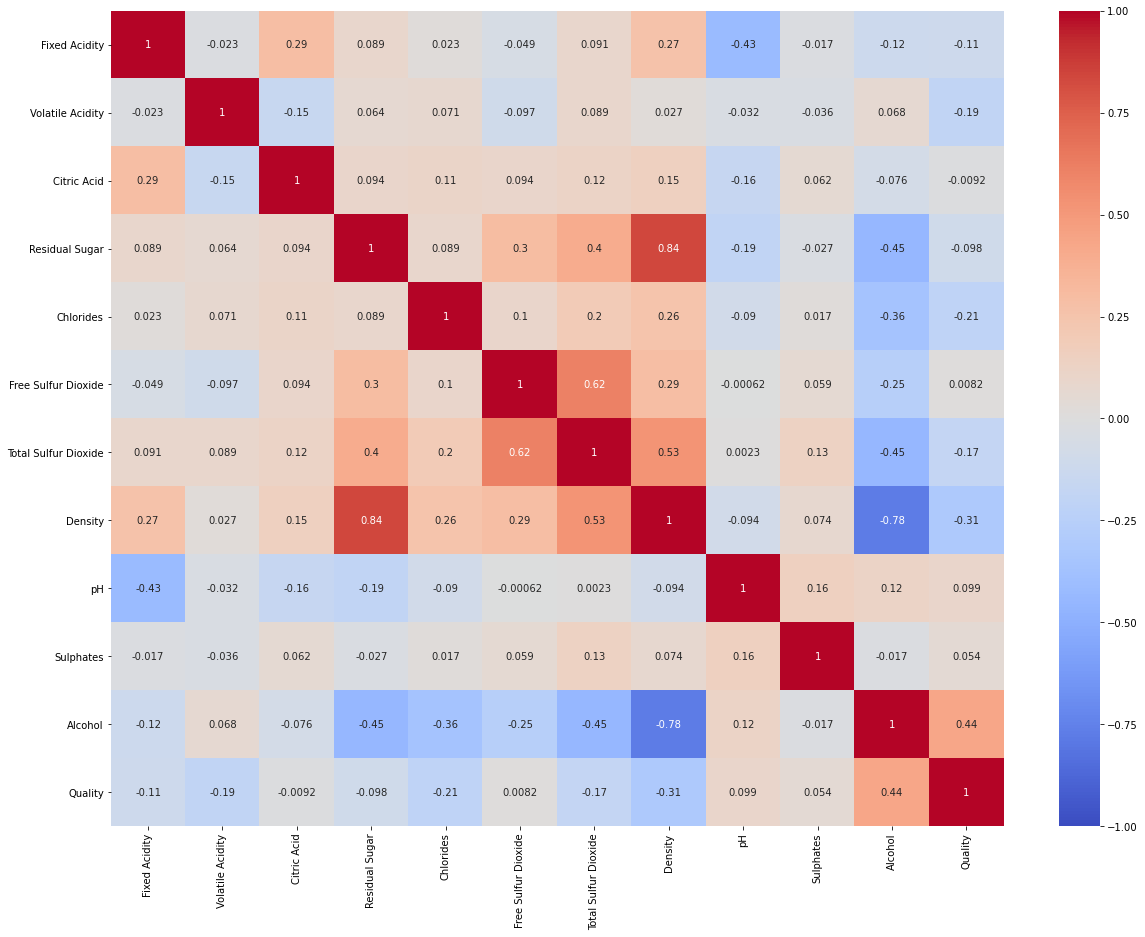

In [12]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)
plt.show()

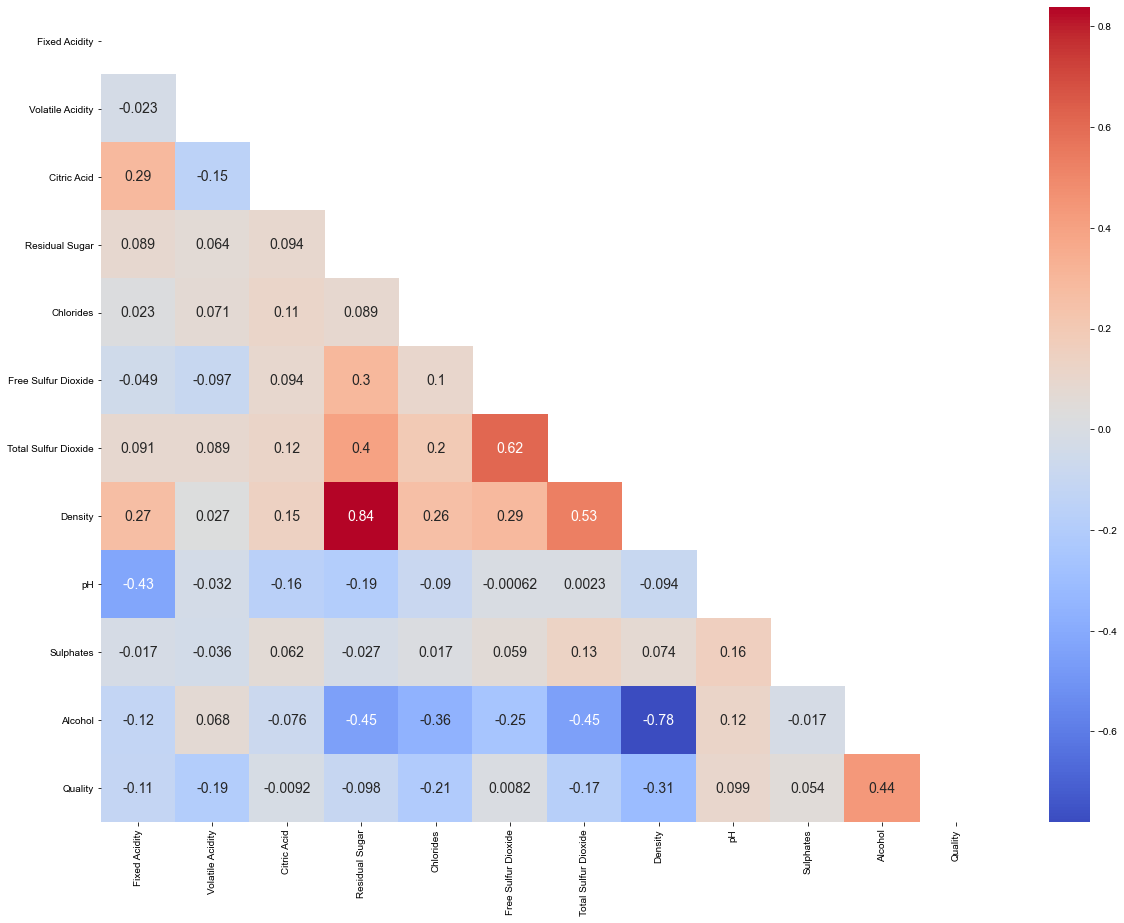

In [13]:
# Heatmap other display
# Creates an array of zeros
zero = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(zero)
zero[triangle_indices] = True
# Check the relationship between all the features with the target (Quality)
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), mask=zero, cmap="coolwarm", annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
# In order of highest correlation (to Quality): Alcohol, Volatile Acidity, Sulphates, Citric Acid, Total Sulfur Dioxide, Density, Chlorides, Fixed Acidity, pH, Free Sulfur Dioxide, Residual Sugar

In [14]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# Splitting dataset into training set & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

### Linear Regression

In [15]:
# Fitting Multiple Linear Regression to the training set
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

## Prediction

In [16]:
# This was taken from the real dataset
print(regr.predict([[6.2,0.2,0.25,15,0.055,8,120,0.99767,3.19,0.53,9.6]]))
# Quality: 6

[5.90477693]


### Evaluation

In [17]:
# Ordinary Least Square (OLS) Principle
x = sm.add_constant(x_train)
model = sm.OLS(y_train, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          9.04e-251
Time:                        17:31:58   Log-Likelihood:                -4191.2
No. Observations:                3673   AIC:                             8406.
Df Residuals:                    3661   BIC:                             8481.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.3332     21.015      6.488      0.0

In [18]:
# Evaluate our model using MSE criterion
y_pred = regr.predict(x_test)
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE):  0.5329937846335918


In [19]:
# Check quality value from dataset that is listed
print(df['Quality'].unique())

[6 5 7 8 4 3 9]


In [20]:
# MAPE
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100

In [21]:
mape(y_test, y_pred)
# MAPE result Notes : 
# 1. Below 10% = Excellent
# 2. 10% - 20% = Good
# 3. 21% - 50% = Reasonable
# 4. Above 50% = Inaccurate

10.159305673788257